Credit Risk Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("credit_risk_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.shape

(32581, 12)

# Data Exploration and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


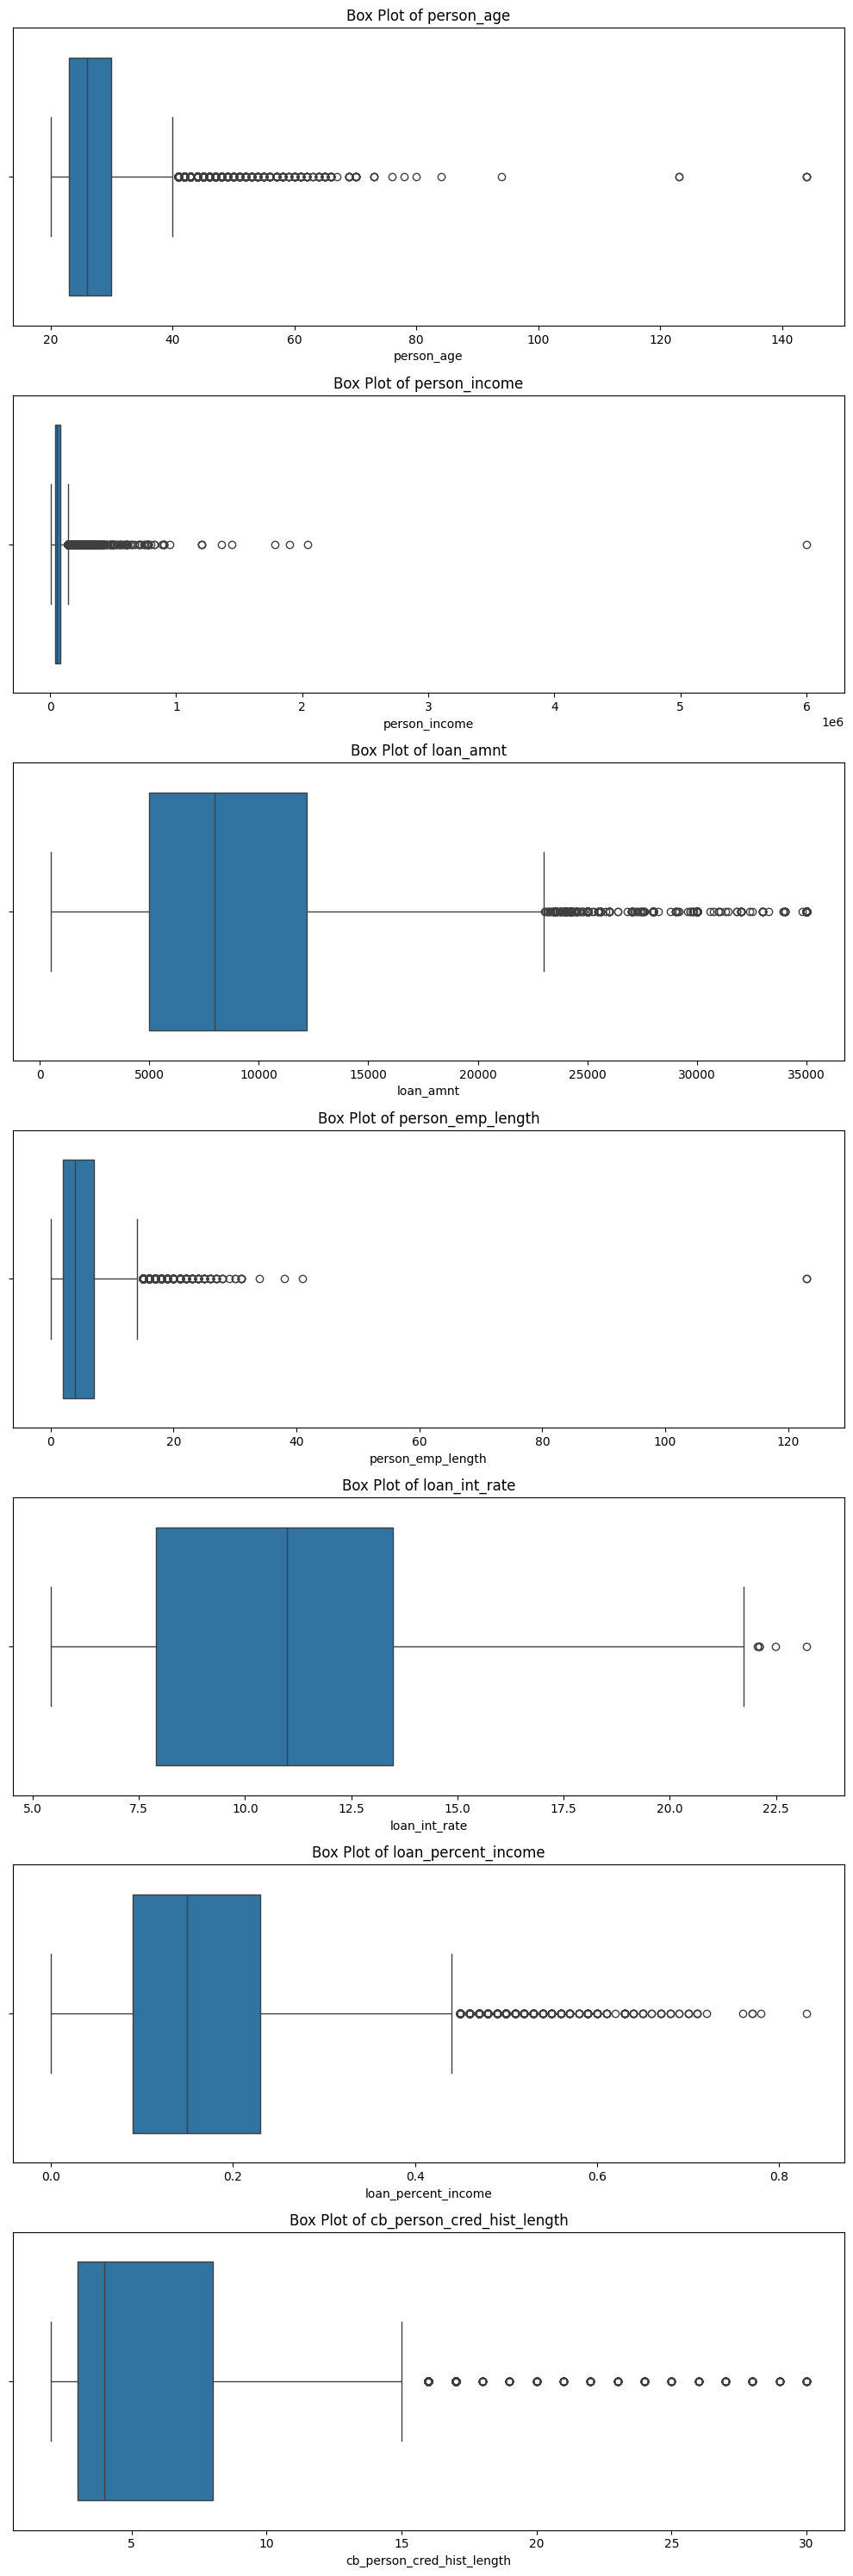

In [ ]:
cols = ["person_age", "person_income", "loan_amnt", "person_emp_length",
        "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
plt.figure(figsize=(10, 30))
for i, col in enumerate(cols):
    plt.subplot(len(cols), 1, i+1)
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

Remove columns with outliers


In [ ]:
columns = ["person_age", "person_income", "loan_amnt", "person_emp_length",
        "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
for column in columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    UL = q3 + 1.5 * IQR
    LL = q1 - 1.5 * IQR
    df = df[(df[column] > LL) & (df[column] < UL)]

In [ ]:
print(df.shape)

(22804, 12)


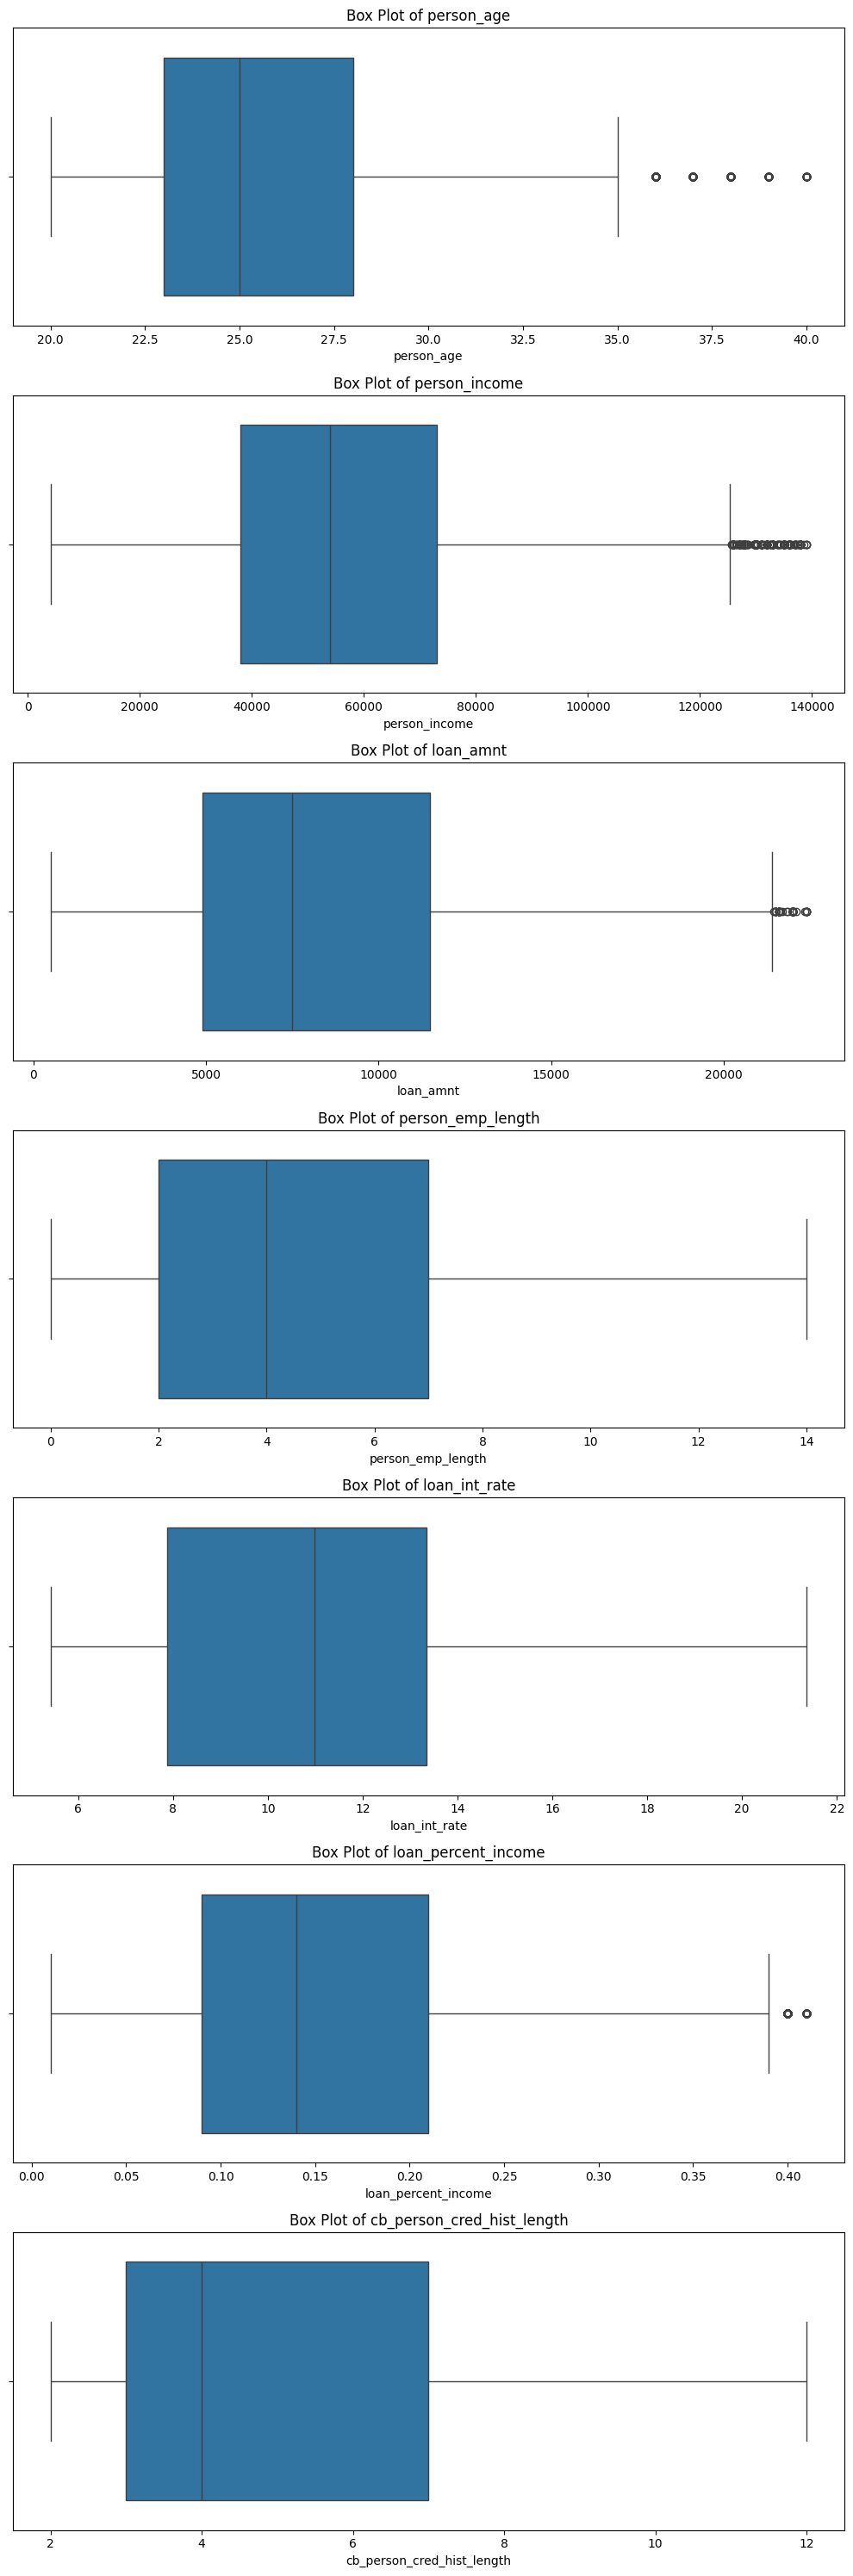

In [ ]:
cols = ["person_age", "person_income", "loan_amnt", "person_emp_length",
        "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
plt.figure(figsize=(10, 30))
for i, col in enumerate(cols):
    plt.subplot(len(cols), 1, i+1)
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

Fill missing values with mean of the data

In [ ]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

<ipython-input-12-640a2abaec19>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
<ipython-input-12-640a2abaec19>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
cols = ["person_age", "person_income", "loan_amnt", "person_emp_length","loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]

correlation_matrix = df[cols].corr()*100
correlation_matrix




,person_age,person_income,loan_amnt,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
person_age,100.000000,9.320666,3.881427,8.282981,1.021762,-3.101115,76.825833
person_income,9.320666,100.000000,36.458778,19.756351,-7.047552,-37.096248,6.281563
loan_amnt,3.881427,36.458778,100.000000,9.302955,8.398983,63.953904,2.889092
person_emp_length,8.282981,19.756351,9.302955,100.000000,-6.970711,-6.690133,7.944599
loan_int_rate,1.021762,-7.047552,8.398983,-6.970711,100.000000,11.385118,1.551106
loan_percent_income,-3.101115,-37.096248,63.953904,-6.690133,11.385118,100.000000,-1.738363
cb_person_cred_hist_length,76.825833,6.281563,2.889092,7.944599,1.551106,-1.738363,100.000000


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,22804.000000,22804.000000,22804.000000,22804.000000,22804.000000,22804.000000,22804.000000,22804.000000
mean,26.089590,57858.523329,4.348842,8381.644668,10.934163,0.200974,0.159555,4.758595
std,3.842238,26151.392756,3.364612,4817.618441,3.189115,0.400737,0.089425,2.613692
min,20.000000,4080.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,23.000000,38004.000000,2.000000,4900.000000,7.880000,0.000000,0.090000,3.000000
50%,25.000000,54000.000000,4.000000,7500.000000,10.990000,0.000000,0.140000,4.000000
75%,28.000000,73001.000000,7.000000,11500.000000,13.350000,0.000000,0.210000,7.000000
max,40.000000,139008.000000,14.000000,22400.000000,21.360000,1.000000,0.410000,12.000000


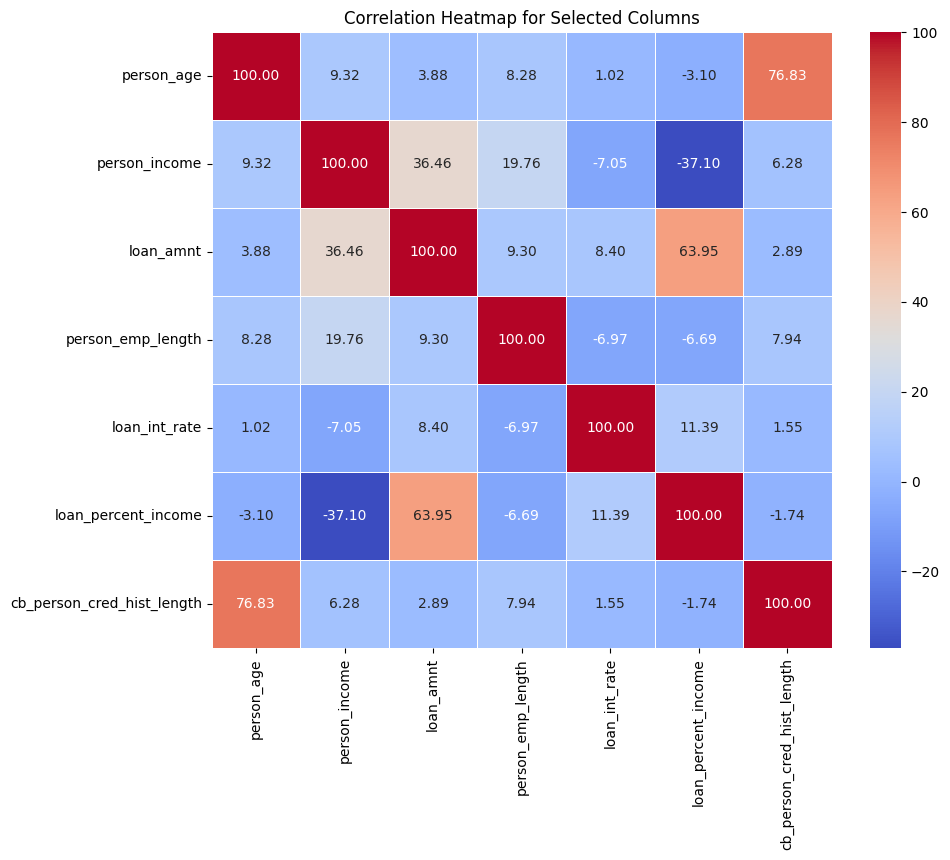

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Selected Columns")
plt.show()

None of the variables are related strongly hence we have decided to keep all

In [ ]:
df.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.1,N,2


In [ ]:
for i in ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']:
    cat_variable = list(df[i].unique())
    cat_variable.sort()
    print("The Original Values are: " ,cat_variable)
    print("The mapped Values shall be: " ,np.arange(len(cat_variable)))

The Original Values are:  ['MORTGAGE', 'OTHER', 'OWN', 'RENT']
The mapped Values shall be:  [0 1 2 3]
The Original Values are:  ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']
The mapped Values shall be:  [0 1 2 3 4 5]
The Original Values are:  ['A', 'B', 'C', 'D', 'E', 'F', 'G']
The mapped Values shall be:  [0 1 2 3 4 5 6]
The Original Values are:  ['N', 'Y']
The mapped Values shall be:  [0 1]


In [ ]:
# Create loan-to-employment length ratio
df['loan_to_emp_length_ratio'] =  df['person_emp_length']/ df['loan_amnt']

# Create interest rate-to-loan amount ratio
df['int_rate_to_loan_amt_ratio'] = df['loan_int_rate'] / df['loan_amnt']

# Random Forest Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
#encode categorical variables
le = LabelEncoder()

df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent']=le.fit_transform(df['loan_intent'])
df['loan_grade']=le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file']=le.fit_transform(df['cb_person_default_on_file'])
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2,0.005000,0.011140
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2,0.000800,0.002856
9,21,10000,2,6.0,5,3,1600,14.74,1,0.16,0,3,0.003750,0.009213
19,24,10800,0,8.0,1,1,1750,10.99,1,0.16,0,2,0.004571,0.006280
23,24,10980,2,0.0,4,0,1500,7.29,0,0.14,0,3,0.000000,0.004860


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2,0.005000,0.011140
1,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2,0.000800,0.002856
2,21,10000,2,6.0,5,3,1600,14.74,1,0.16,0,3,0.003750,0.009213
3,24,10800,0,8.0,1,1,1750,10.99,1,0.16,0,2,0.004571,0.006280
4,24,10980,2,0.0,4,0,1500,7.29,0,0.14,0,3,0.000000,0.004860


In [ ]:
y=df['loan_status']
X=df.drop(['loan_status'], axis=1)

In [ ]:
X = X.values
y = y.values

In [ ]:
X

array([[2.10000000e+01, 9.60000000e+03, 2.00000000e+00, ...,
        2.00000000e+00, 5.00000000e-03, 1.11400000e-02],
       [2.10000000e+01, 9.90000000e+03, 2.00000000e+00, ...,
        2.00000000e+00, 8.00000000e-04, 2.85600000e-03],
       [2.10000000e+01, 1.00000000e+04, 2.00000000e+00, ...,
        3.00000000e+00, 3.75000000e-03, 9.21250000e-03],
       ...,
       [3.70000000e+01, 6.50000000e+04, 3.00000000e+00, ...,
        1.20000000e+01, 5.83333333e-04, 1.16500000e-03],
       [3.70000000e+01, 6.84800000e+04, 3.00000000e+00, ...,
        1.10000000e+01, 5.55555556e-04, 4.23055556e-03],
       [3.80000000e+01, 3.60000000e+04, 0.00000000e+00, ...,
        1.20000000e+01, 5.00000000e-04, 2.33166667e-03]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
rf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = rf.predict(X_test)

# metrics are used to find accuracy or error
print()

# using metrics module for accuracy calculation


# EVALUATION

In [ ]:
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.9201987722888044


In [ ]:
rf.predict([[21,9600,2,5.0,1,1,1000,11.14,.1,0,2,.005,.01114]])

array([0])

In [ ]:
metrics.roc_auc_score(y_test, rf.predict(X_test))

np.float64(0.8164959895348158)

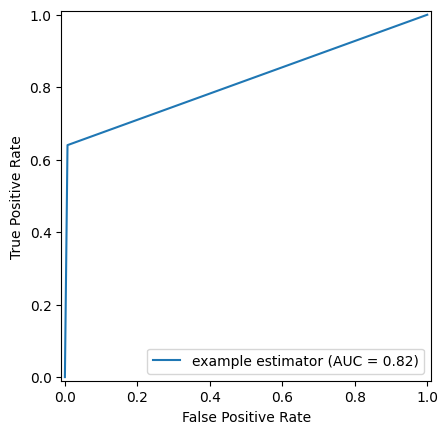

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

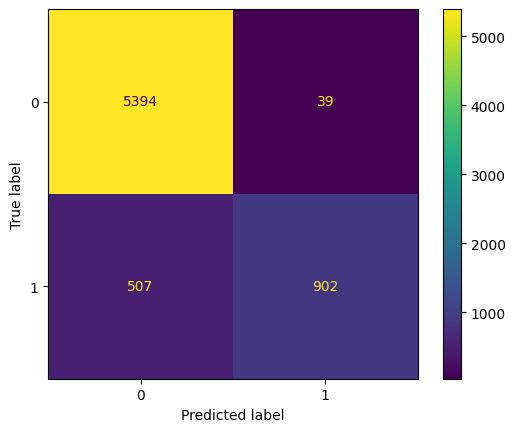

In [ ]:
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5433
           1       0.96      0.64      0.77      1409

    accuracy                           0.92      6842
   macro avg       0.94      0.82      0.86      6842
weighted avg       0.92      0.92      0.91      6842

